<a href="https://colab.research.google.com/github/UsmanSharif001/FractureAI/blob/main/crackai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""train-yolov11-object-detection.ipynb
# How to Train YOLOv11 on a Custom Dataset
---
Built with Ultralytics YOLOv11, released October 2024.
"""

# Check GPU availability
!nvidia-smi

Wed Mar  5 10:55:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Set Home Directory
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Install Ultralytics (YOLOv11)
!pip install -q ultralytics roboflow supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12

In [ ]:
# Download Dataset from Roboflow
import roboflow
roboflow.login()
rf = roboflow.Roboflow()
project = rf.workspace("ml-mandatory-1").project("crackai")
version = project.version(1)
dataset = version.download("yolov8")  # YOLOv11 uses YOLOv8 format

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to CrackAI-1 in yolov8:: 100%|██████████| 126/126 [00:00<00:00, 8603.14it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Train YOLOv11
from ultralytics import YOLO
model = YOLO("yolo11m.pt")  # Medium model; adjust to yolov11n.pt, yolov11s.pt, etc.
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,
    batch=8,
    device=0,
    patience=15  # Early stopping if no improvement
)

Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/CrackAI-1/data.yaml, epochs=50, time=None, patience=15, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

train: Scanning /content/CrackAI-1/train/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/CrackAI-1/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.48G      3.027      4.657      2.942         20        640: 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         10         14    0.00233        0.5    0.00457    0.00114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.16G      3.128      5.266      3.053         15        640: 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         10         14    0.00654        0.5    0.00588    0.00114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.27G      2.663      5.339      2.858         21        640: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         10         14    0.00407     0.0714    0.00109    0.00028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.32G      2.612      3.889      2.607         16        640: 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         10         14    0.00036     0.0714   0.000261   0.000109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.27G      2.886      4.429      2.598          8        640: 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         10         14      0.001      0.214   0.000844   0.000324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.27G      2.726      3.914       2.57         21        640: 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         10         14   0.000667      0.143   0.000807   0.000234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.31G      2.738      3.715      2.488         18        640: 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         10         14    0.00135      0.286   0.000983   0.000328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.32G      2.741      3.737      2.642         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

                   all         10         14    0.00182      0.143    0.00113   0.000164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.31G      2.737      3.764      2.435         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         10         14     0.0123      0.214     0.0221      0.003



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.31G      2.803       3.55      2.654         15        640: 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         10         14          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.28G      2.763      3.406      2.675         22        640: 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         10         14          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.27G      2.793      3.612      2.617         17        640: 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         10         14          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.27G      2.819      3.574      2.663         18        640: 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         10         14          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.27G       2.72      3.519      2.651         15        640: 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         10         14          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.32G       2.59       3.56      2.638          7        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         10         14          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.36G       2.72      3.407      2.633         10        640: 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all         10         14          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.33G      2.708      3.502      2.683         13        640: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         10         14          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.35G      2.653      3.916      2.798         11        640: 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all         10         14          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.35G      2.758      3.495      2.826         24        640: 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all         10         14          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.32G      2.561      3.412      2.712         15        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

                   all         10         14   0.000958     0.0714   0.000772   0.000308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.31G       2.62      3.304      2.666         22        640: 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         10         14   0.000958     0.0714   0.000772   0.000308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.31G      2.591      3.161      2.607         15        640: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         10         14    0.00167     0.0714   0.000929   0.000373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.31G      2.545      3.199      2.574         19        640: 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

                   all         10         14     0.0019      0.286    0.00126   0.000334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.27G      2.389       3.43      2.522         13        640: 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         10         14     0.0019      0.286    0.00126   0.000334
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 9, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



24 epochs completed in 0.023 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 40.5MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]


                   all         10         14     0.0124      0.214     0.0222    0.00301
Speed: 0.2ms preprocess, 10.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train7


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ecb56b7d350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# Validate Model
results = model.val(
    data=f"{dataset.location}/data.yaml",
    imgsz=640,
    batch=16,
    conf=0.001,
    iou=0.7,
    device=0
)

Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


val: Scanning /content/CrackAI-1/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


                   all         10         14     0.0122      0.214     0.0221    0.00243
Speed: 0.3ms preprocess, 30.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train72


In [ ]:
# Inference on Test Images
results = model.predict(
    source=f"{dataset.location}/test/images",
    conf=0.7,
    imgsz=1280,
    device=0,
    iou=0.3,
    save=True  # Saves to runs/detect/predict/
)


image 1/7 /content/CrackAI-1/test/images/04802caa3f5c0941f3e79c0ce53e7aeb_jpg.rf.31ab6bc1aeabe6603f76d086010a724e.jpg: 1280x1280 (no detections), 96.9ms
image 2/7 /content/CrackAI-1/test/images/4d83d807fe7af170aa25b936567aa7e4_jpg.rf.09b528c09209c343b409889f355e883c.jpg: 1280x1280 (no detections), 81.7ms
image 3/7 /content/CrackAI-1/test/images/6d4ef48a7422e5887a5d124f2d09d57e_jpg.rf.0e6c2d1a6abe288461261f3b0e60ab5a.jpg: 1280x1280 (no detections), 81.8ms
image 4/7 /content/CrackAI-1/test/images/Fracture11_jpg.rf.c23dd814f81e627b97b55eddde3aa96e.jpg: 1280x1280 (no detections), 80.0ms
image 5/7 /content/CrackAI-1/test/images/Fracture6_jpg.rf.c8198290b8bb890040a5301849f94073.jpg: 1280x1280 (no detections), 82.3ms
image 6/7 /content/CrackAI-1/test/images/Fracture9_jpg.rf.2a1a922423d39a4f5052ac27ca6273f4.jpg: 1280x1280 (no detections), 82.1ms
image 7/7 /content/CrackAI-1/test/images/dd9681ec4af72ff0d63e696337df4d5d_jpg.rf.22fae8c655a7f614c3eff596bb9bd1e6.jpg: 1280x1280 (no detections), 81.

/content/runs/detect/train3/Fracture6_jpg.rf.c8198290b8bb890040a5301849f94073.jpg


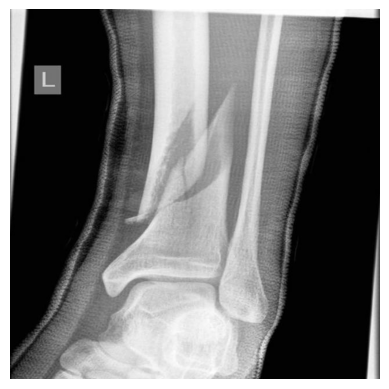

/content/runs/detect/train3/4d83d807fe7af170aa25b936567aa7e4_jpg.rf.09b528c09209c343b409889f355e883c.jpg


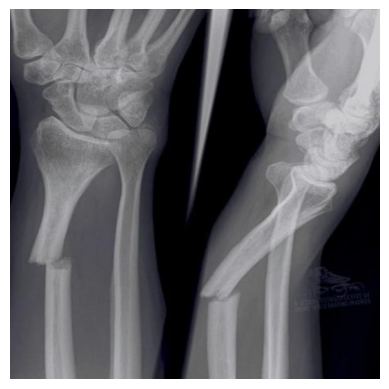

/content/runs/detect/train3/Fracture11_jpg.rf.c23dd814f81e627b97b55eddde3aa96e.jpg


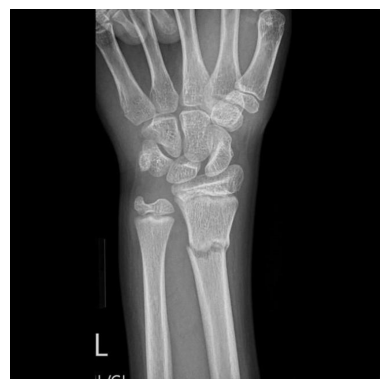

/content/runs/detect/train3/6d4ef48a7422e5887a5d124f2d09d57e_jpg.rf.0e6c2d1a6abe288461261f3b0e60ab5a.jpg


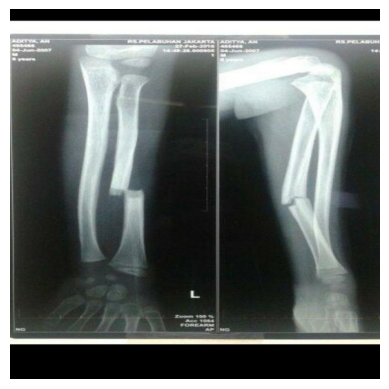

/content/runs/detect/train3/Fracture9_jpg.rf.2a1a922423d39a4f5052ac27ca6273f4.jpg


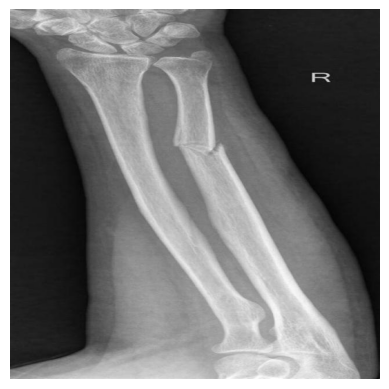

/content/runs/detect/train3/04802caa3f5c0941f3e79c0ce53e7aeb_jpg.rf.31ab6bc1aeabe6603f76d086010a724e.jpg


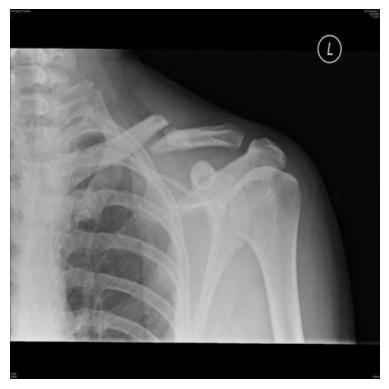

/content/runs/detect/train3/dd9681ec4af72ff0d63e696337df4d5d_jpg.rf.22fae8c655a7f614c3eff596bb9bd1e6.jpg


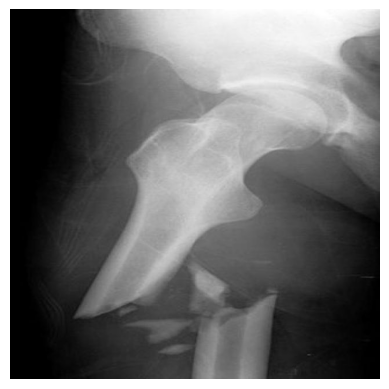

In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt
# Find all images
image_folder = "/content/runs/detect/train3"
image_paths = glob.glob(f"{image_folder}/*")

# Loop through images and show them
for image_path in image_paths:
    image = cv2.imread(image_path)

    # Convert BGR (OpenCV default) to RGB (for matplotlib)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image_path)
    # Show the image
    plt.imshow(image)
    plt.axis('off')  # Hide axis for cleaner display
    plt.show()